## 머신러닝
# 단어사전 (Bag of Words)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 단어사전

In [2]:
docs = ['There is a boy.', 'The boy is very pretty.']

In [3]:
data = []
for s in docs:
    s2 = s.replace('.', '')
    s2 = s2.lower()
    data.append(s2.split())
    
data

[['there', 'is', 'a', 'boy'], ['the', 'boy', 'is', 'very', 'pretty']]

In [4]:
bow = {}
n = 0

for doc in data:
    for word in doc:
        if word not in bow:
            bow[word] = n
            n += 1
            
bow

{'there': 0, 'is': 1, 'a': 2, 'boy': 3, 'the': 4, 'very': 5, 'pretty': 6}

In [5]:
X = []

for doc in data:
    l = []
    for word in doc:
        l.append(bow[word])
    X.append(l)
    
X

[[0, 1, 2, 3], [4, 3, 1, 5, 6]]

In [6]:
### 원핫인코딩 (One-Hot-Encoding)
X2 = []

for x in X:
    a = np.eye(7)[x] #####
    X2.append(a)
    
X2

[array([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])]

### CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ['There is a boy.', 'The boy is very pretty.']
vect = CountVectorizer()
vect.fit(docs)

CountVectorizer()

In [8]:
vect.vocabulary_

{'there': 4, 'is': 1, 'boy': 0, 'the': 3, 'very': 5, 'pretty': 2}

In [9]:
vect.transform(docs)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
vect.transform(docs).toarray()

array([[1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1]], dtype=int64)

In [11]:
vect.transform(['very very pretty boy']).toarray()

array([[1, 0, 1, 0, 0, 2]], dtype=int64)

### IMDb 데이터
- IMDb 영화 리뷰 데이터셋 : https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/data/aclImdb_v1.tar.gz
- 압축을 풀어 data/aclImdb 폴더로 옮긴다
> ```
./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/train/unsup
```

- ./data/aclImdb/train/unsup 폴더를 지운다

In [6]:
'''from sklearn.datasets import load_files

imdb_train = load_files('data/aclImdb/train/')
imdb_test = load_files('data/aclImdb/test/')

np.save('imdb.npy',[imdb_train, imdb_test])'''

"from sklearn.datasets import load_files\n\nimdb_train = load_files('data/aclImdb/train/')\nimdb_test = load_files('data/aclImdb/test/')\n\nnp.save('imdb.npy',[imdb_train, imdb_test])"

In [7]:
imdb_train, imdb_test = np.load('imdb.npy', allow_pickle=True)

In [14]:
type(imdb_train), type(imdb_test)

(sklearn.utils.Bunch, sklearn.utils.Bunch)

In [15]:
imdb_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [16]:
type(imdb_train.data), len(imdb_train.data)

(list, 25000)

In [17]:
type(imdb_test.data), len(imdb_test.data)

(list, 25000)

In [18]:
imdb_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [19]:
imdb_train.data[0].decode()

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [20]:
text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
len(text_train)

25000

In [21]:
y_train = imdb_train.target
display(y_train.shape, y_train)

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [22]:
sum(y_train)

12500

In [23]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
len(text_test)

25000

In [24]:
y_test = imdb_test.target
display(y_test.shape, y_test)

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [25]:
sum(y_test)

12500

- load_files() 함수는 폴더 이름을 알파벳 순서로 읽기 때문에, 'neg' 폴더는 0, 'pos' 폴더는 1 로 타겟값이 지정된다.
- imdb_train.target_names 값의 순서이기도 하다.
> **정리**
> - text_train => list, 25000
> - y_train => array, 25000
> - text_test => list, 25000
> - y_test => array, 25000

In [26]:
vect = CountVectorizer()
vect.fit(text_train) # 단어집이 만들어진다
X_train = vect.transform(text_train) # sparse matrix

In [27]:
X_train

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>

In [28]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 75911)

In [29]:
for i,(k,v) in enumerate(vect.vocabulary_.items()):
    print(k,v)
    if i==10: break

zero 75669
day 16986
leads 38653
you 75381
to 68091
think 67468
even 23059
re 54503
why 73998
two 69757
boys 8922


In [30]:
feature_names = vect.get_feature_names()
display(type(feature_names), len(feature_names))
display(feature_names[:5], feature_names[20010:20015], feature_names[::10000], feature_names[-5:])

list

75911

['00', '000', '0000000000001', '00001', '00015']

['doppelgangers', 'doppelgänger', 'dopplebangers', 'doppleganger', 'doppler']

['00',
 'burress',
 'dop',
 'hallucinogenics',
 'looping',
 'periphery',
 'shaffer',
 'una']

['ís', 'ísnt', 'østbye', 'über', 'üvegtigris']

### 분류 모델 적용
- 테스트세트를 적용하여 점수 확인
- C 값으로 0.1 을 적용한다
> **주의** : text_train 으로 단어집을 만들었으므로 text_test 에는 단어집에 없는 단어가 있을 수 있다

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [33]:
X_test = vect.transform(text_test)
X_test.shape

(25000, 75911)

In [34]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

d:\anaconda3_5.3.0\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [35]:
score = model.score(X_test, y_test)
score

0.87844

In [36]:
model.score(X_train, y_train)

0.96864

In [37]:
w = model.coef_[0]
type(w), w.shape

(numpy.ndarray, (75911,))

In [38]:
fn = np.array(vect.get_feature_names())

In [39]:
indexer = w.argsort()

fn[indexer[:20]] # 큰 음수값들, 즉 부정적인 영향을 끼침

array(['waste', 'worst', 'disappointment', 'poorly', 'awful', 'lacks',
       'boring', 'disappointing', 'mess', 'fails', 'avoid', 'horrible',
       'dull', 'save', 'worse', 'poor', 'laughable', 'lame', 'badly',
       'pointless'], dtype='<U74')

In [40]:
fn[indexer[-1:-21:-1]] # 큰 양수값들, 즉 긍정적인 영향을 끼침

array(['excellent', 'perfect', 'funniest', 'refreshing', 'wonderfully',
       'superb', 'rare', 'surprisingly', 'enjoyable', 'incredible',
       'today', 'loved', 'favorite', 'subtle', 'wonderful', 'highly',
       'amazing', 'gem', 'enjoyed', 'recommended'], dtype='<U74')

In [41]:
np.r_[indexer[:20], indexer[-20:]]

array([73247, 74748, 18945, 51563,  5431, 37995,  8716, 18942, 42981,
       23922,  5371, 32153, 20703, 58449, 74731, 51560, 38480, 38140,
        5706, 51326, 54842, 22258, 27483,  3067, 31393, 74538, 64928,
       24367, 40162, 68119, 33725, 22256, 65531, 54296, 65279, 74540,
       55137, 26787, 49947, 23260], dtype=int64)

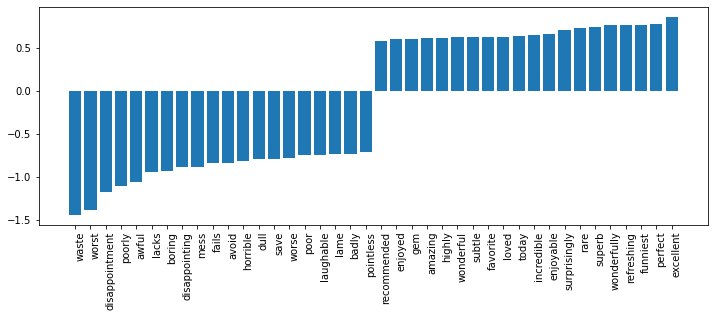

In [42]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), np.r_[fn[indexer[:20]], fn[indexer[-20:]]], rotation=90, ha='left')
print('')